In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import glob
from PIL import Image 
import cv2
import os
import collections

import warnings
warnings.filterwarnings('ignore')

import os
print(os.listdir("../input"))
from subprocess import check_output
print(check_output(["ls", "../input"]).decode("utf8"))


['fruits-360_dataset']
fruits-360_dataset



In [2]:
indi = 50
img_size = 70
c1 = 32
c2 = 2*c1
c3 = 2*c2
c4 = 2*c3
aug = 0
d1 = 1024
d2 = 512

d_out_c = 0.23
d_out_d = 0.46
lr1 = 0.0001
epochs=50

In [3]:
np.random.seed(4444)
data_path1="../input/fruits-360_dataset/fruits-360/Training/"
classes = []
ind = 1
aa = []
aa.append('Apple Red 1')
aa.append('Potato Sweet')
# aa.append('Pear')
aa.append('Carambula')
aa.append('Pear Red')
aa.append('Apple Golden 1')
aa.append('Banana')
for folder_name in os.listdir(data_path1):
    if(folder_name in aa):
        pass
    else:
        classes.append(folder_name)
        ind+=1
    if(ind>indi):
        break
print(len(classes))

50


In [4]:
all_arrays=[]

ind=1
print("Reading training data: ")
for i in classes:
    path=os.path.join(data_path1,i)
    class_num=classes.index(i)
    if(ind==1 or ind%int(indi/10)==0):
        print(ind, "Out of ",len(classes), " is done")
    ind+=1
    for img in os.listdir(path):
        img_array=cv2.imread(os.path.join(path,img),
                             cv2.IMREAD_GRAYSCALE)
        img_array=cv2.resize(img_array,(img_size,img_size))
        all_arrays.append([img_array,class_num])
    if ind>indi:
        break
print('done here')

Reading training data: 
1 Out of  50  is done
5 Out of  50  is done
10 Out of  50  is done
15 Out of  50  is done
20 Out of  50  is done
25 Out of  50  is done
30 Out of  50  is done
35 Out of  50  is done
40 Out of  50  is done
45 Out of  50  is done
50 Out of  50  is done
done here


In [5]:
data_path2="../input/fruits-360_dataset/fruits-360/Test/"
classes2 = []
ind = 1
for folder_name in os.listdir(data_path2):
    if(folder_name in aa):
        pass
    else:
        classes2.append(folder_name)
        ind+=1
    if ind>indi:
        break
print(len(classes2), "fruits for Testing ")

all_arrays2 = []

ind = 1
print("Reading training data: ")
for i in classes2:
    path=os.path.join(data_path2,i)
    class_num2=classes2.index(i)
    if(ind==1 or ind%int(indi/10)==0):
        print(ind, "Out of ",len(classes)," is done")
    ind+=1
    for img in os.listdir(path):
        img_array2=cv2.imread(os.path.join(path,img),
                             cv2.IMREAD_GRAYSCALE)
        img_array2=cv2.resize(img_array2,(img_size,img_size))
        all_arrays2.append([img_array2,class_num2])
    if ind>indi:
        break
print('done here')

50 fruits for Testing 
Reading training data: 
1 Out of  50  is done
5 Out of  50  is done
10 Out of  50  is done
15 Out of  50  is done
20 Out of  50  is done
25 Out of  50  is done
30 Out of  50  is done
35 Out of  50  is done
40 Out of  50  is done
45 Out of  50  is done
50 Out of  50  is done
done here


In [6]:
fruits_array_train=[]
for features,label in all_arrays:
    fruits_array_train.append(features)

In [7]:
import random
random.shuffle(all_arrays)

X_train=[]
Y_train=[]
for features,label in all_arrays:
    X_train.append(features)
    Y_train.append(label)
X_train=np.array(X_train)

import random
random.shuffle(all_arrays2)

X_test=[]
Y_test=[]
for features,label in all_arrays2:
    X_test.append(features)
    Y_test.append(label)
X_test=np.array(X_test)


In [8]:
X_train=X_train.reshape(-1,img_size,img_size,1)
X_train=X_train/255
X_test=X_test.reshape(-1,img_size,img_size,1)
X_test=X_test/255
print("shape of X_train= ",X_train.shape)
print("shape of X_test=  ",X_test.shape)

shape of X_train=  (25587, 70, 70, 1)
shape of X_test=   (8780, 70, 70, 1)


In [9]:
from keras.utils import to_categorical
Y_train=to_categorical(Y_train,num_classes=len(classes))
Y_test=to_categorical(Y_test,num_classes=len(classes))

Using TensorFlow backend.


In [10]:
from sklearn.model_selection import  train_test_split
x_train,x_val,y_train,y_val=train_test_split(X_train,Y_train,test_size=0.15,random_state=42)

In [11]:
from sklearn.metrics import confusion_matrix
import itertools

from keras.utils.np_utils import to_categorical
from keras.models import Sequential
from keras.layers import Dense,Dropout,Flatten,Conv2D,MaxPool2D
from keras.optimizers import RMSprop,Adam
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import ReduceLROnPlateau


model=Sequential()

model.add(Conv2D(filters=c1,kernel_size=(5,5),padding="Same",activation="relu",input_shape=(img_size,img_size,1)))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(d_out_c))

model.add(Conv2D(filters=c2,kernel_size=(5,5),padding="Same",activation="relu"))
model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))
model.add(Dropout(d_out_c))

model.add(Conv2D(filters=c3,kernel_size=(5,5),padding="Same",activation="relu"))
model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))
model.add(Dropout(d_out_c))

model.add(Conv2D(filters=c4,kernel_size=(5,5),padding="Same",activation="relu"))
model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))
model.add(Dropout(d_out_c))

model.add(Flatten())

model.add(Dense(d1,activation="relu"))
model.add(Dropout(d_out_d))

model.add(Dense(d2,activation="relu"))
model.add(Dropout(d_out_d))

model.add(Dense(len(classes),activation="softmax"))

optimizer=Adam(lr=lr1,beta_1=0.9,beta_2=0.999)
model.compile(optimizer=optimizer,loss="binary_crossentropy",metrics=["accuracy"])


batch_size=64

In [12]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 70, 70, 32)        832       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 35, 35, 32)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 35, 35, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 35, 35, 64)        51264     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 17, 17, 64)        0         
_________________________________________________________________
dropout_2 (Dropout)          (None, 17, 17, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 17, 17, 128)       204928    
__________

In [13]:
datagen=ImageDataGenerator(featurewise_center=False, 
                           samplewise_center=False,  
                           featurewise_std_normalization=False, 
                           samplewise_std_normalization=False,  
                           zca_whitening=False,  
                           rotation_range=aug,  
                           zoom_range=aug,      
                           width_shift_range=aug, 
                           height_shift_range=aug,
                           horizontal_flip=False,  
                           vertical_flip=False,
                           )
datagen.fit(x_train)

history=model.fit_generator(datagen.flow(x_train,y_train,batch_size=batch_size),epochs=epochs,
                            validation_data=(x_val,y_val),steps_per_epoch=x_train.shape[0]//batch_size)


Epoch 1/50
339/339 [==============================] - 16s 46ms/step - loss: 0.0832 - acc: 0.9801 - val_loss: 0.0541 - val_acc: 0.9818
Epoch 2/50
339/339 [==============================] - 7s 20ms/step - loss: 0.0419 - acc: 0.9846 - val_loss: 0.0298 - val_acc: 0.9872
Epoch 3/50
339/339 [==============================] - 7s 20ms/step - loss: 0.0213 - acc: 0.9919 - val_loss: 0.0179 - val_acc: 0.9925
Epoch 4/50
339/339 [==============================] - 7s 20ms/step - loss: 0.0122 - acc: 0.9954 - val_loss: 0.0088 - val_acc: 0.9963
Epoch 5/50
339/339 [==============================] - 7s 20ms/step - loss: 0.0077 - acc: 0.9972 - val_loss: 0.0075 - val_acc: 0.9971
Epoch 6/50
339/339 [==============================] - 7s 21ms/step - loss: 0.0053 - acc: 0.9981 - val_loss: 0.0041 - val_acc: 0.9985
Epoch 7/50
339/339 [==============================] - 7s 20ms/step - loss: 0.0040 - acc: 0.9986 - val_loss: 6.8594e-04 - val_acc: 0.9998
Epoch 8/50
339/339 [==============================] - 7s 20ms/st

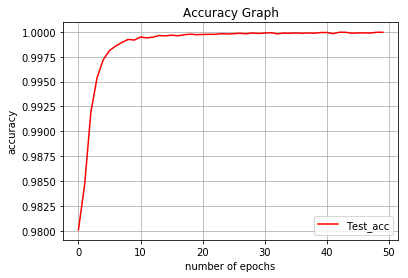

In [14]:
# graph plotting for laidation accuracy
plt.plot(history.history["acc"],color="r",label="Test_acc")
plt.title("Accuracy Graph")
plt.xlabel("number of epochs")
plt.ylabel("accuracy")
plt.legend()
plt.grid()
plt.show()

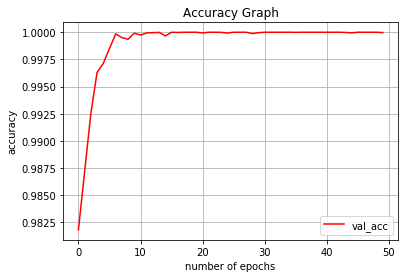

In [15]:
# graph plotting for laidation accuracy
plt.plot(history.history["val_acc"],color="r",label="val_acc")
plt.title("Accuracy Graph")
plt.xlabel("number of epochs")
plt.ylabel("accuracy")
plt.legend()
plt.grid()
plt.show()

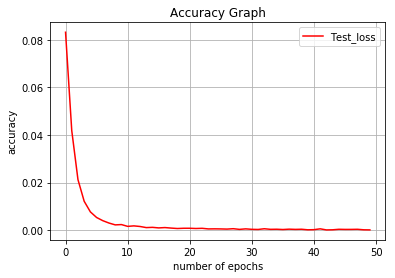

In [16]:
plt.plot(history.history["loss"],color="r",label="Test_loss")
plt.title("Accuracy Graph")
plt.xlabel("number of epochs")
plt.ylabel("accuracy")
plt.legend()
plt.grid()
plt.show()

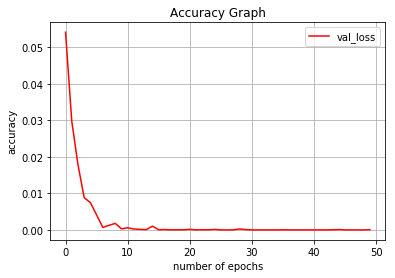

In [17]:
plt.plot(history.history["val_loss"],color="r",label="val_loss")
plt.title("Accuracy Graph")
plt.xlabel("number of epochs")
plt.ylabel("accuracy")
plt.legend()
plt.grid()
plt.show()

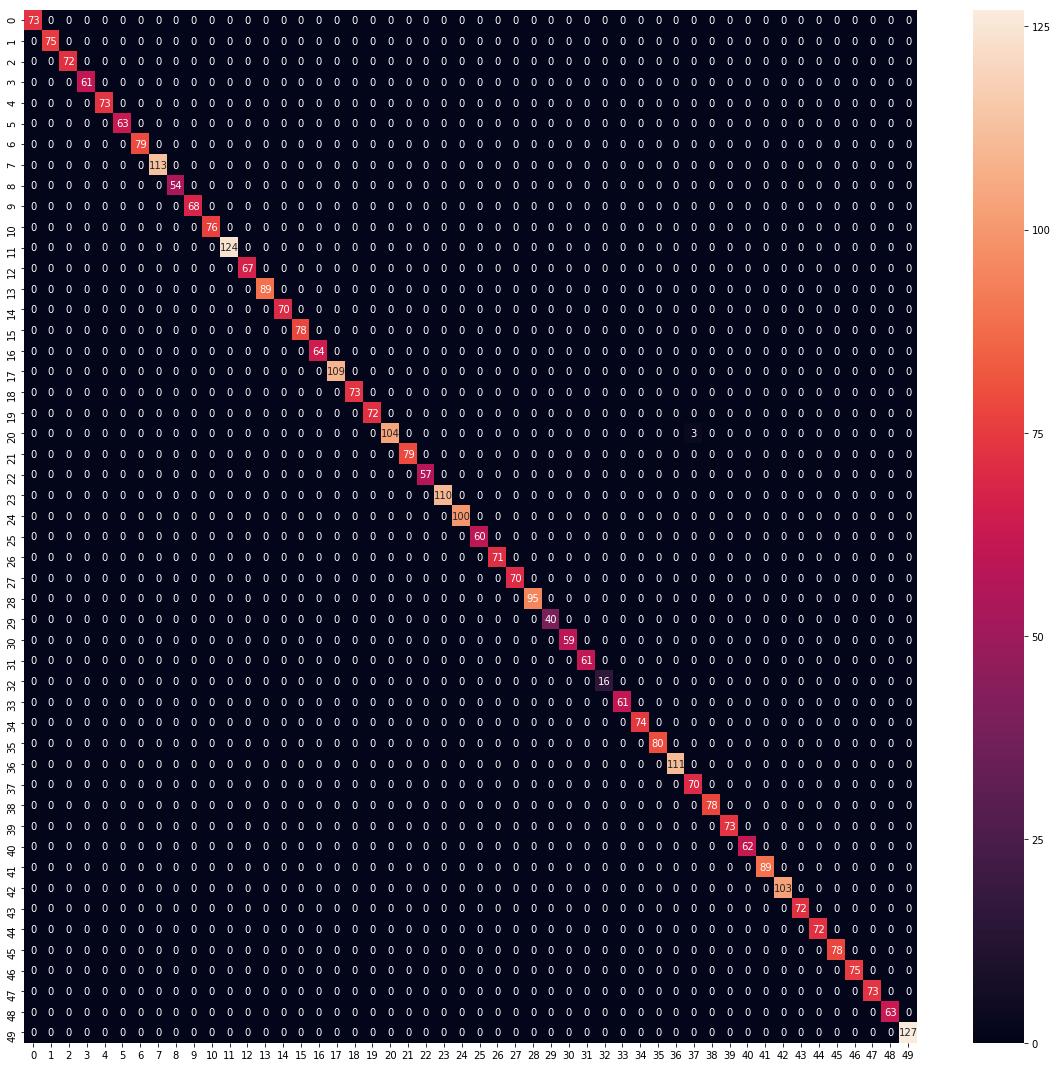

99.92185464964835 Percent validation accuracy


In [18]:
#confusion matrix for validation data
y_pred=model.predict(x_val)
y_pred_classes=np.argmax(y_pred,axis=1)
y_true=np.argmax(y_val,axis=1)

conf_mat=confusion_matrix(y_true,y_pred_classes)

f,ax=plt.subplots(figsize=(20,19))
sns.heatmap(conf_mat,annot=True,fmt='.0f')
plt.show()

n = 0;
d = 0;
for i in range(len(y_true)):
    if(y_true[i] == y_pred_classes[i]):
        n += 1
    d += 1
val_accu=n*100/d
print(val_accu, "Percent validation accuracy")

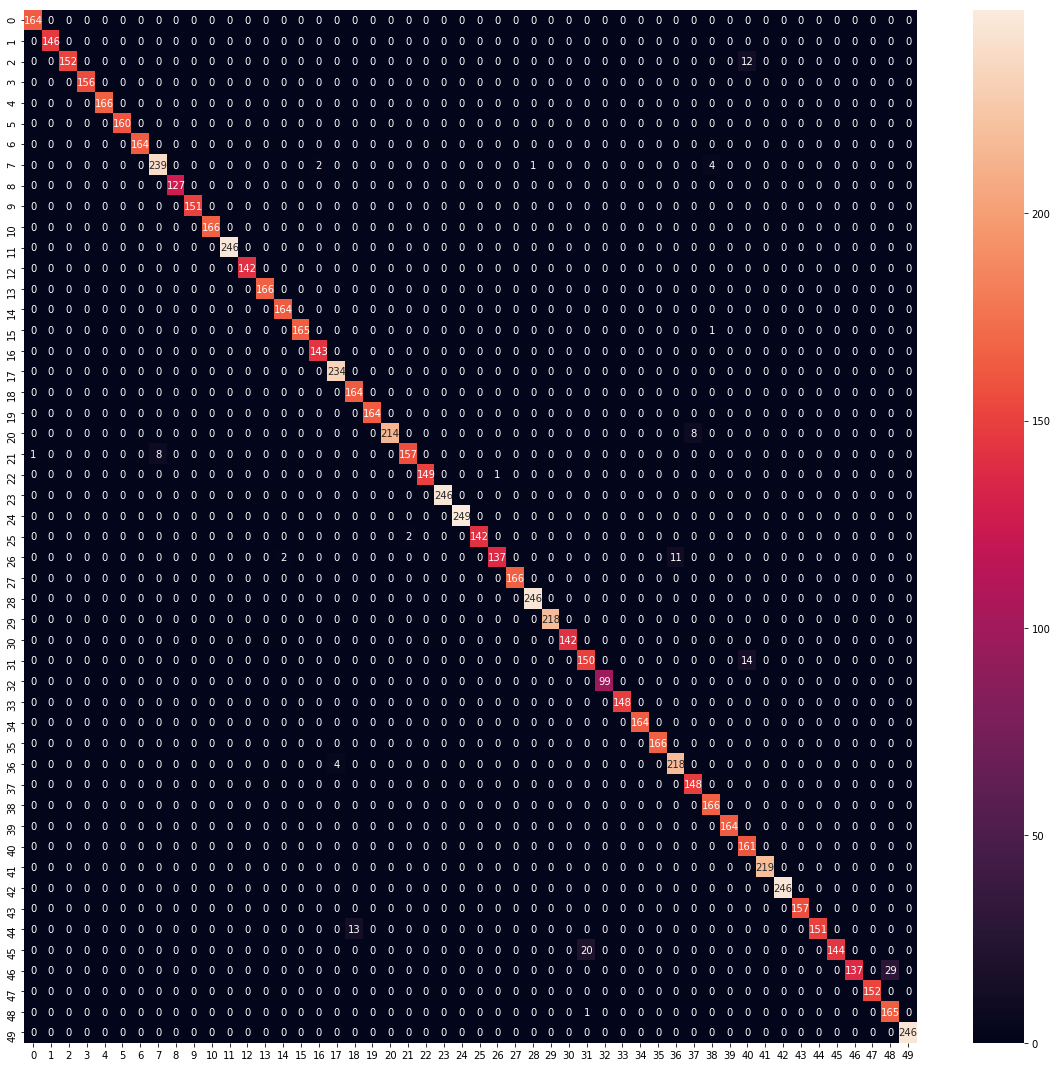

98.51523834331857 Percent test accuracy


In [19]:
#confusion matrix for test data
y_pred2=model.predict(X_test)
y_pred_classes2=np.argmax(y_pred2,axis=1)
y_true2=np.argmax(Y_test,axis=1)

conf_mat2=confusion_matrix(y_true2,y_pred_classes2)

f,ax=plt.subplots(figsize=(20,19))
sns.heatmap(conf_mat2,annot=True,fmt=".0f")
plt.show()

n = 0;
d = 0;
for i in range(len(y_true)):
    if(y_true2[i] == y_pred_classes2[i]):
        n += 1
    d += 1
test_accu=n*100/d
print(test_accu, "Percent test accuracy")

In [20]:
TP = []
TD = []
for i in range(len(classes)):
    TP.append(0)
    TD.append(0)
    
n = 0;
d = 0;
for i in range(len(y_true)):
    if(y_true2[i] == y_pred_classes2[i]):
        TP[y_true2[i]]+=1
    TD[y_true2[i]]+=1


In [21]:
print("Testing phase worst accuracy fruits:")
for i in range(len(classes)):
    accur = (TP[i]/TD[i])*100
    if(accur<test_accu/(1.3)):
        print(i,":",int(accur*10)/10,"Percent",classes[i])

Testing phase worst accuracy fruits:
